In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
from matplotlib.animation import FuncAnimation
syp.interactive.printing.init_printing(use_latex= True)

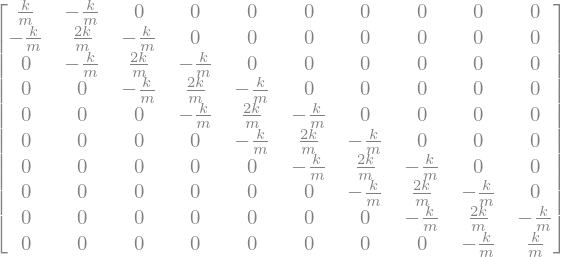

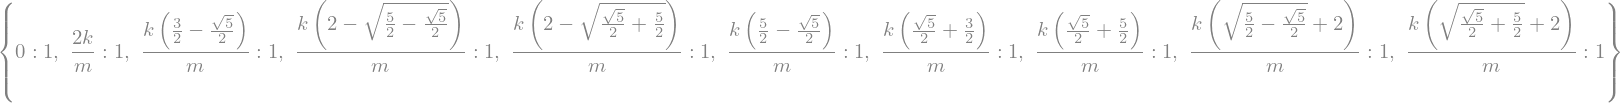

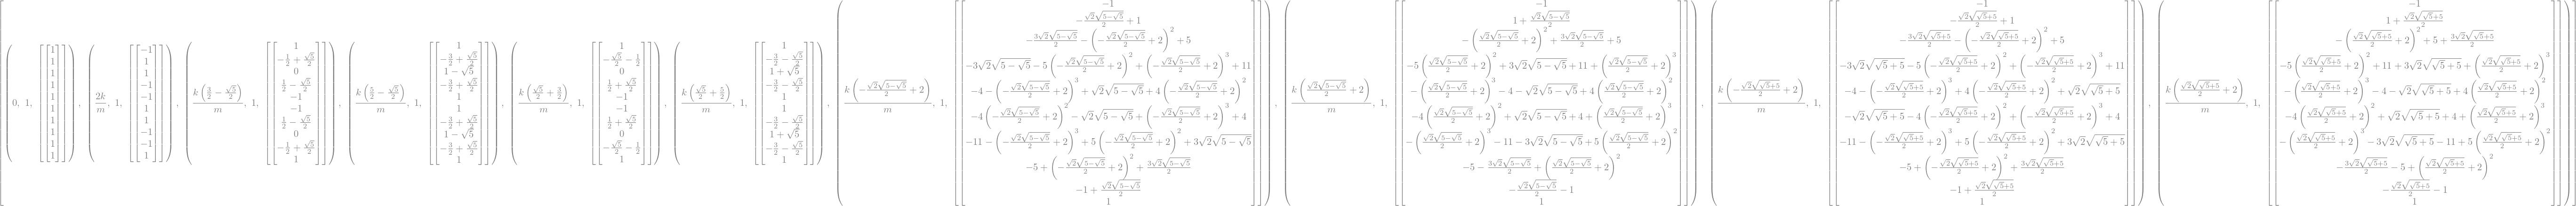

\left[\begin{matrix}\frac{k}{m} & - \frac{k}{m} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\- \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m} & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & - \frac{k}{m} & \frac{2 k}{m} & - \frac{k}{m}\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & - \frac{k}{m} & \frac{k}{m}\end{matrix}\right]
\left\{ 0 : 1, \  \frac{2 k}{m} : 1, \  \frac{k \left(\frac{3}{2} - \frac{\sqrt{5}}{2}\right)}{m} : 1, \  \frac{k \left(2 - \sqrt{\frac{5}{2} - \frac{\sqrt{5}}{2}}\right)}{m} : 1, \  \frac{k \left(2 - \sqrt{\frac{\sqrt{5}}{2} + \frac{5}{2}}

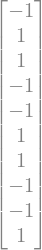

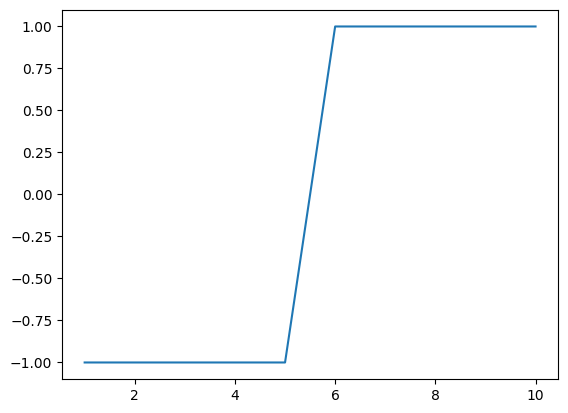

In [5]:
#2
m = syp.Symbol('m')
k = syp.Symbol('k')
N = 10
def f(i,j):
    if i == 0 and j == 0 or i == N-1 and j == N-1:
        return 1 * (k/m)
    elif i == j:
        return 2 * (k/m)
    elif i+1 == j or i-1 == j:
        return -1 * (k/m)
    else:
        return 0
L = syp.Matrix(N, N, f)
l = L.eigenvals()
v = L.eigenvects()
display(L)
display(l)
display(v)
print(syp.latex(L))
print(syp.latex(l))
print(syp.latex(v))
# 
v2 = v[1][2][0]
display(v2)
vs = list(v2)
vs.sort()
x = np.arange(1, 11)
plt.plot(x, vs)
plt.show()


In [9]:
#3
#a
def Random_Network(N):
    print("Random Network - Erdos-Renyi Construction for", N, "nodes")
    G = nx.erdos_renyi_graph(N, 0.3)
    nx.draw_spring(G, with_labels = True)
    A = nx.to_numpy_array(G)
    plt.show()
    print("This is the adjacency matrix:")
    print(A)
    print()

    d = list(nx.degree(G))
    D = np.zeros((N,N))
    for i in range(N):
        D[i][i] = d[i][1]
    print("This is the degree matrix:")
    print(D)
    print()

    L = D - A
    print("This is the Laplacian of the network:")
    print(L)
    print()

    # eig, eigv = np.linalg.eig(L)
    # index = 0
    # temp = eig[0]
    # for i in range(len(eig)):
    #     if eig[i] <= temp and eig[i] != 0:
    #         index = i
    # f = eigv[index]
    # f.sort()
    # print(eig[index])
    # eig.sort()
    # print(eig)
    # print(f)

    if nx.is_connected(G) == True:
        v = nx.fiedler_vector(G)
        v.sort()
        print("This is the Fielder vector of the network:")
        print(v)
        plt.plot(np.arange(1, N+1), v)
        plt.show()

        print("This is the average path length:")
        l = nx.average_shortest_path_length(G)
        print(l)
        print()

    print("This is the betweenness centralities of the network:")
    C = nx.betweenness_centrality(G)
    print(C)
    print()

    print("This is the clustering coefficient of the network:")
    c = nx.clustering(G)
    print(c)
    print()


Random Network - Erdos-Renyi Construction for 20 nodes


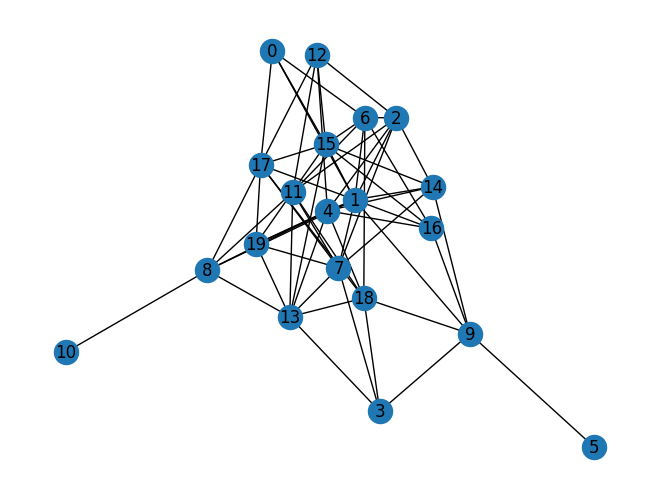

This is the adjacency matrix:
[[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0.

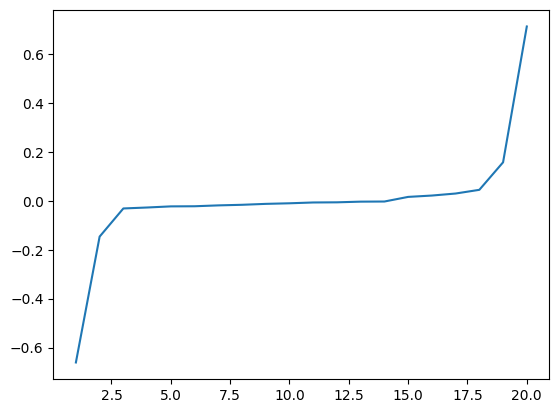

This is the average path length:
1.8263157894736841

This is the betweenness centralities of the network:
{0: 0.0014619883040935672, 1: 0.17163742690058476, 2: 0.02199480181936322, 3: 0.011208576998050682, 4: 0.06972059779077322, 5: 0.0, 6: 0.034600389863547756, 7: 0.04571150097465887, 8: 0.11286549707602339, 9: 0.1257309941520468, 10: 0.0, 11: 0.03947368421052631, 12: 0.010136452241715398, 13: 0.05565302144249512, 14: 0.02426900584795321, 15: 0.05756985055230669, 16: 0.015107212475633526, 17: 0.05363872644574398, 18: 0.06052631578947367, 19: 0.006822612085769979}

This is the clustering coefficient of the network:
{0: 0.8333333333333334, 1: 0.36363636363636365, 2: 0.47619047619047616, 3: 0.5, 4: 0.2777777777777778, 5: 0, 6: 0.38095238095238093, 7: 0.35714285714285715, 8: 0.26666666666666666, 9: 0.2, 10: 0, 11: 0.3333333333333333, 12: 0.3, 13: 0.35714285714285715, 14: 0.4666666666666667, 15: 0.3333333333333333, 16: 0.5, 17: 0.32142857142857145, 18: 0.23809523809523808, 19: 0.6}



In [10]:
Random_Network(20)

In [6]:
#b
def Scale_Free(N):
    print("Scale-Free Network - Albert and Barabsi Construction of", N, "nodes")
    F = nx.barabasi_albert_graph(N, 5)
    nx.draw_spring(F, with_labels = True)
    A = nx.to_numpy_array(F)
    plt.show()
    print("This is the adjacency matrix:")
    print(A)
    print()

    d = list(nx.degree(F))
    D = np.zeros((N,N))
    for i in range(N):
        D[i][i] = d[i][1]
    print("This is the degree matrix:")
    print(D)
    print()

    L = D - A
    print("This is the Laplacian of the network:")
    print(L)
    print()

    if nx.is_connected(F) == True:
        v = nx.fiedler_vector(F)
        v.sort()
        print("This is the Fielder vector of the network:")
        print(v)
        plt.plot(np.arange(1, N+1), v)
        plt.show()
        
        print("This is the average path length:")
        l = nx.average_shortest_path_length(F)
        print(l)
        print()


    print("This is the betweenness centralities of the network:")
    C = nx.betweenness_centrality(F)
    print(C)
    print()

    print("This is the clustering coefficient of the network:")
    c = nx.clustering(F)
    print(c)
    print()


Scale-Free Network - Albert and Barabsi Construction of 20 nodes


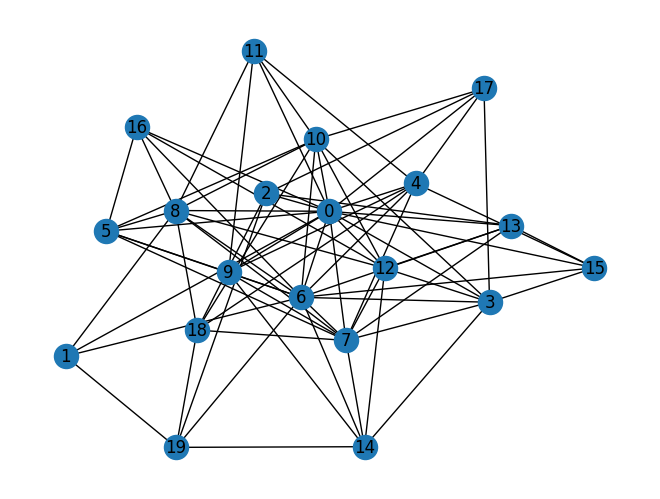

This is the adjacency matrix:
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0.

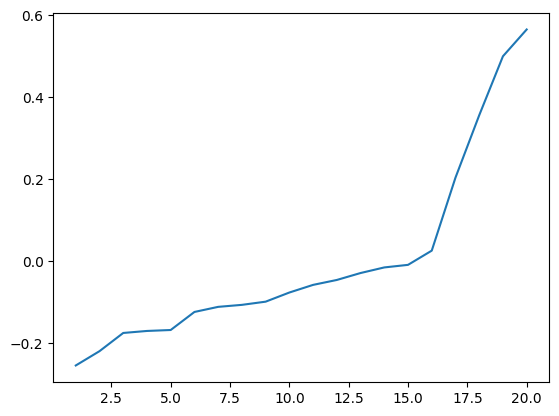

This is the average path length:
1.6105263157894736

This is the betweenness centralities of the network:
{0: 0.18499721526037313, 1: 0.004873294346978557, 2: 0.02017543859649123, 3: 0.025835421888053465, 4: 0.03489278752436647, 5: 0.007755499860763018, 6: 0.12997772208298525, 7: 0.050730994152046786, 8: 0.04610832637148427, 9: 0.017446393762183234, 10: 0.037280701754385956, 11: 0.004970760233918128, 12: 0.02276524644945697, 13: 0.013596491228070173, 14: 0.01827485380116959, 15: 0.003801169590643275, 16: 0.0019005847953216374, 17: 0.009161793372319687, 18: 0.02315510999721526, 19: 0.02066276803118908}

This is the clustering coefficient of the network:
{0: 0.36666666666666664, 1: 0.6666666666666666, 2: 0.3, 3: 0.5357142857142857, 4: 0.42857142857142855, 5: 0.7142857142857143, 6: 0.37362637362637363, 7: 0.4727272727272727, 8: 0.4888888888888889, 9: 0.6190476190476191, 10: 0.4444444444444444, 11: 0.6, 12: 0.5, 13: 0.5333333333333333, 14: 0.5333333333333333, 15: 0.7, 16: 0.8, 17: 0.5, 18:

In [8]:
Scale_Free(20)

In [6]:
# for n in range(10, 101, 10):
#     Scale_Free(n)

In [11]:
#c
def Small_World(N):
    print("Small-World Network - Watts and Strogatz's Construction with", N, "nodes")
    W = nx.watts_strogatz_graph(N, 10, 0.5)
    nx.draw_spring(W, with_labels = True)
    A = nx.to_numpy_array(W)
    plt.show()
    print("This is the adjacency matrix:")
    print(A)
    print()

    d = list(nx.degree(W))
    D = np.zeros((N,N))
    for i in range(N):
        D[i][i] = d[i][1]
    print("This is the degree matrix:")
    print(D)
    print()

    L = D - A
    print("This is the Laplacian of the network:")
    print(L)
    print()

    if nx.is_connected(W) == True:
        v = nx.fiedler_vector(W)
        v.sort()
        print("This is the Fielder vector of the network:")
        print(v)
        plt.plot(np.arange(1, N+1), v)
        plt.show()

        print("This is the average path length:")
        l = nx.average_shortest_path_length(W)
        print(l)
        print()

    print("This is the betweenness centralities of the network:")
    C = nx.betweenness_centrality(W)
    print(C)
    print()

    print("This is the clustering coefficient of the network:")
    c = nx.clustering(W)
    print(c)
    print()


Small-World Network - Watts and Strogatz's Construction with 20 nodes


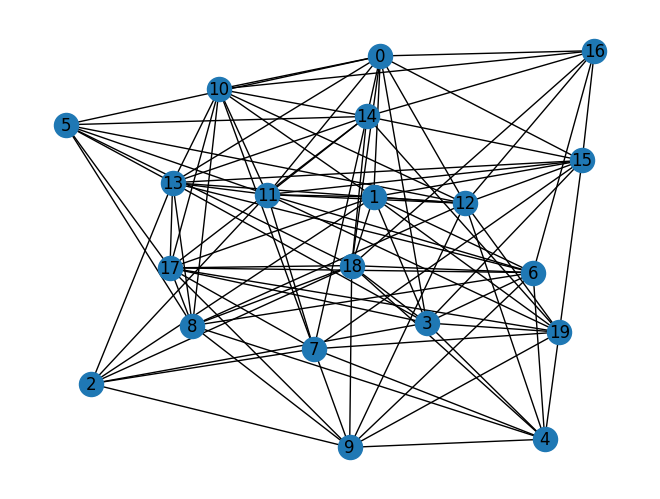

This is the adjacency matrix:
[[0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 0. 1.

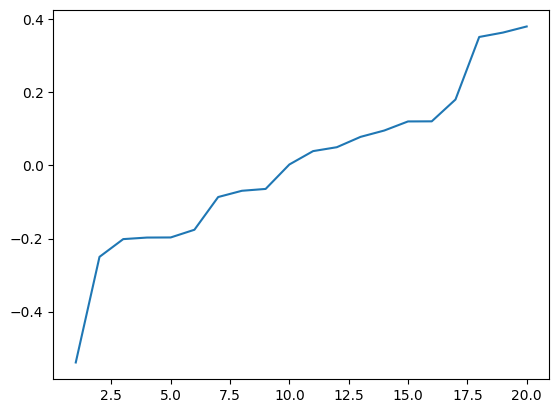

This is the average path length:
1.4736842105263157

This is the betweenness centralities of the network:
{0: 0.022363779819920167, 1: 0.027568922305764406, 2: 0.011767845539775366, 3: 0.024201707973637798, 4: 0.014438874965190751, 5: 0.009182678919521025, 6: 0.02785667873387171, 7: 0.02481203007518797, 8: 0.017481203007518795, 9: 0.019813422445001387, 10: 0.02294161329249048, 11: 0.0363919056901513, 12: 0.051046597976422525, 13: 0.03902116402116401, 14: 0.028815093288777495, 15: 0.020790401930752808, 16: 0.009565580618212196, 17: 0.03940638633621089, 18: 0.05543024227234753, 19: 0.023419660261765524}

This is the clustering coefficient of the network:
{0: 0.6, 1: 0.509090909090909, 2: 0.42857142857142855, 3: 0.5111111111111111, 4: 0.5357142857142857, 5: 0.6428571428571429, 6: 0.4666666666666667, 7: 0.4722222222222222, 8: 0.5833333333333334, 9: 0.5277777777777778, 10: 0.5333333333333333, 11: 0.5151515151515151, 12: 0.45454545454545453, 13: 0.5, 14: 0.5454545454545454, 15: 0.57777777777

In [12]:
Small_World(20)

In [15]:
def remove_degree(G, pos):
    d = dict(nx.degree(G))
    highd = max(d, key = d.get)
    G.remove_node(highd)
    nx.draw(G, with_labels = True, pos = pos)
    # plt.show()
    # L = nx.to_numpy_array(G)
    # eig = np.linalg.eigvals(L)
    # eig.sort()
    # print(eig)

MovieWriter ffmpeg unavailable; using Pillow instead.


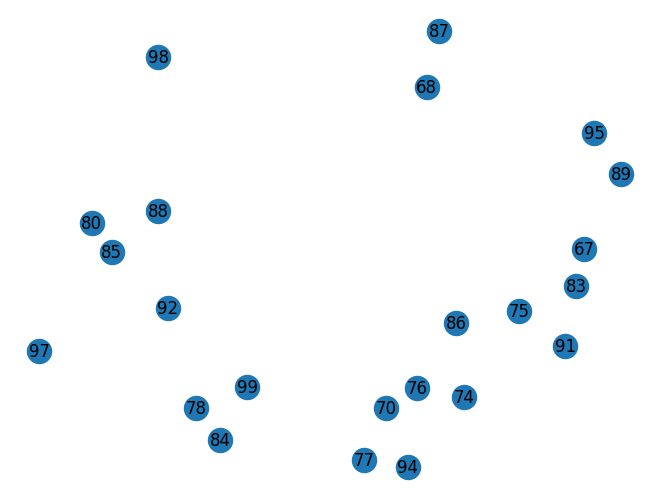

In [20]:
fig = plt.figure()
G = nx.barabasi_albert_graph(100, 5)
pos = nx.spring_layout(G)
def animate(i):
    nx.draw(G, with_labels = True, pos = pos)
    plt.clf()
    remove_degree(G, pos)
anim = FuncAnimation(fig, animate, frames = 75, interval = 50)
anim.save('Animation2.gif')

In [21]:
# #
# N = 100
# hd = 5
# G = nx.barabasi_albert_graph(N, hd)
# pos = nx.spring_layout(G)
# nx.draw(G, with_labels = True,pos = pos)
# plt.show()
# # L = nx.to_numpy_array(G)
# # eig = np.linalg.eigvals(L)
# # eig.sort()
# # print(eig)
# for i in range(50):
#     remove_degree(G, pos)

In [22]:
def remove_centerality(G, pos):
    c = dict(nx.betweenness_centrality(G))
    highc = max(c, key = c.get)
    G.remove_node(highc)
    nx.draw(G, with_labels = True, pos = pos)

MovieWriter ffmpeg unavailable; using Pillow instead.


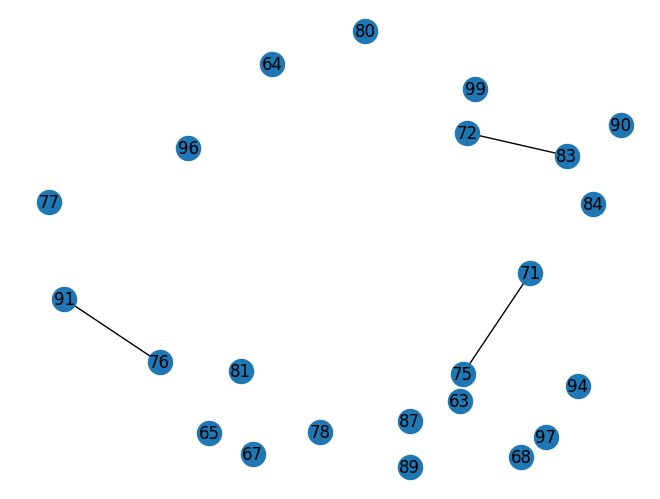

In [23]:
fig = plt.figure()
G = nx.barabasi_albert_graph(100, 5)
pos = nx.spring_layout(G)
def animate(i):
    nx.draw(G, with_labels = True, pos = pos)
    plt.clf()
    remove_centerality(G, pos)
anim = FuncAnimation(fig, animate, frames = 75, interval = 50)
anim.save('Centerality Remover.gif')

In [24]:
# N = 100
# hd = 5
# G = nx.barabasi_albert_graph(N, hd)
# pos = nx.spring_layout(G)
# nx.draw(G, with_labels = True,pos = pos)
# plt.show()
# for i in range(50):
#     remove_centerality(G, pos)

In [28]:
def remove_randomly(G, pos):
    n = list(G.nodes)
    randn = rand.choice(n)
    G.remove_node(randn)
    nx.draw(G, with_labels = True, pos = pos)

MovieWriter ffmpeg unavailable; using Pillow instead.


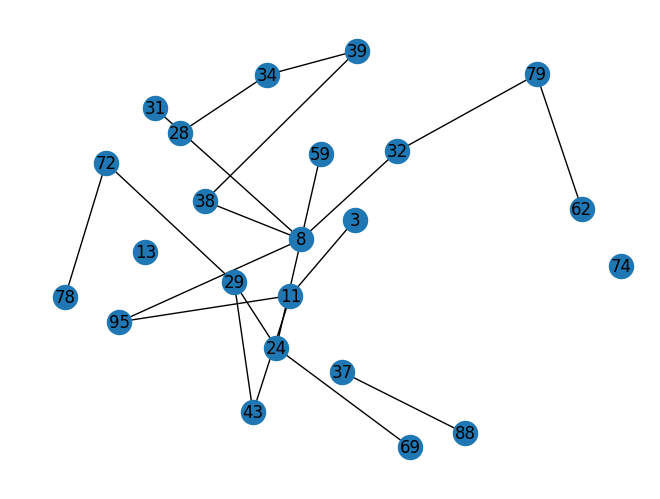

In [29]:
fig = plt.figure()
G = nx.barabasi_albert_graph(100, 5)
pos = nx.spring_layout(G)
def animate(i):
    nx.draw(G, with_labels = True, pos = pos)
    plt.clf()
    remove_randomly(G, pos)
anim = FuncAnimation(fig, animate, frames = 75, interval = 50)
anim.save('Random Remover.gif')

In [ ]:
N = 100
hd = 5
G = nx.barabasi_albert_graph(N, hd)
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True,pos = pos)
plt.show()
for i in range(50):
    remove_randomly(G, pos)